<a href="https://colab.research.google.com/github/JohnEaganFS/CSCI191T/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 191T - Machine Learning
# Name: John Eagan 
# Assignment: MNIST - Digit Recognition

In [163]:
import sklearn
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Loading MNIST dataset

I uploaded the mnist datasets as zip files to my github repo.
I then used colab's !wget to download the zip file and !unzip to unzip it into the session storage as a csv.

In [164]:
if not(os.path.isfile("/content/mnist_train.zip")):
  !wget https://github.com/JohnEaganFS/CSCI191T/raw/main/datasets/mnist_train.zip
if not(os.path.isfile("/content/mnist_test.zip")):
  !wget https://github.com/JohnEaganFS/CSCI191T/raw/main/datasets/mnist_test.zip
if not(os.path.isfile("/content/train.csv")):
  !unzip /content/mnist_train.zip
if not(os.path.isfile("/content/test.csv")):
  !unzip /content/mnist_test.zip

# Loading the training set

In [165]:
mnistTrain = pd.read_csv("train.csv")
trainingData = mnistTrain.values
print(trainingData.shape)
print(trainingData[1,1:])

(42000, 785)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  30 137 137
 192  86  72   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  16 179 254 254 254
 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254
 104   0   0   0   0   0   0   0   0   0   0   0   0   0  61 191 254 254
 254 254 254 109  83 199 254 254 254 2

[0 0 0 0 0]


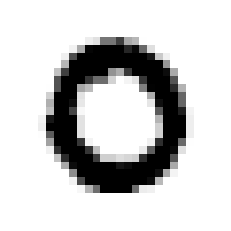

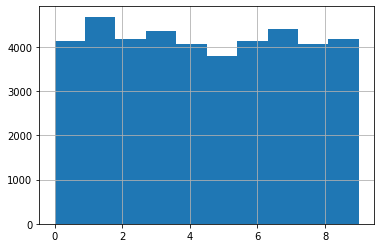

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [166]:
myNum = trainingData[1,1:]
print(myNum[:5])
myNum = myNum.reshape((28,28))
plt.imshow(myNum, cmap = plt.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
mnistTrain['label'].hist()
plt.show()
print(mnistTrain.columns)

# Dimensionality Reduction

Reducing the dimensionality to around 100 features/components seemed to be a good cutoff point in terms of training time and accuracy.

In [167]:
from sklearn.decomposition import PCA
n = 100
rnd_pca = PCA(n_components=n)

rnd_pca.fit(trainingData[:,1:])
X_reduced = rnd_pca.transform(trainingData[:,1:])
print(X_reduced.shape)

(42000, 100)


28


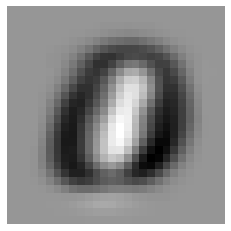

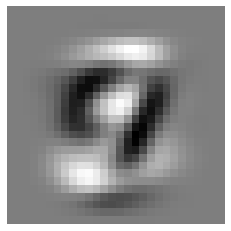

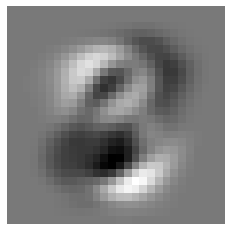

In [168]:
eigennumbers = rnd_pca.components_.reshape((n,28,28))
myNumber = eigennumbers[0]
print (len(myNumber))
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
myNumber = eigennumbers[1]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
myNumber = eigennumbers[2]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

# Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [170]:
clf = LogisticRegression(solver='saga',
                        max_iter=10000)
clf.fit(X_reduced, trainingData[:, 0])

LogisticRegression(max_iter=10000, solver='saga')

In [171]:
predict = clf.predict(X_reduced)
print("Accuracy = ", accuracy_score(predict, trainingData[:, 0]))

Accuracy =  0.9175


# Test Set

In [172]:
mnistTest = pd.read_csv("test.csv")
testData = mnistTest.values
X_reduced_test = rnd_pca.transform(testData)
print(X_reduced_test.shape)

(28000, 100)


In [173]:
predict = clf.predict(X_reduced_test)

In [174]:
mnistTest.index.name='ImageId'

mnistTest['label']=predict

mnistTest.index += 1

In [175]:
if not(os.path.isfile("/content/submissionLogisticRegression.csv")):
  mnistTest['label'].to_csv('submissionLogisticRegression.csv', index=True, header=True)

# MLP Classifier

In [176]:
from sklearn.neural_network import MLPClassifier

In [177]:
clfMLP = MLPClassifier()
clfMLP.fit(trainingData[:,1:], trainingData[:,0])

MLPClassifier()

In [178]:
predict = clfMLP.predict(trainingData[:,1:])
print("Accuracy = ", accuracy_score(predict, trainingData[:, 0]))

Accuracy =  0.9940714285714286


In [179]:
predict = clfMLP.predict(testData)

In [180]:
mnistTest['label'] = predict

In [181]:
if not(os.path.isfile("/content/submissionMLP.csv")):
  mnistTest['label'].to_csv('submissionMLP.csv', index=True, header=True)

# Scaling the Pixel Values

In [182]:
X = mnistTrain.values[:,1:]
Y = mnistTrain.values[:,0]

## Sklearn's MinMaxScaler

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## Training MLP with scaled values

In [184]:
clfMLP = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=20, alpha=1e-4, 
                    solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)
clfMLP.fit(X, Y)

Iteration 1, loss = 0.36543975
Iteration 2, loss = 0.17442623
Iteration 3, loss = 0.13014811
Iteration 4, loss = 0.10546337
Iteration 5, loss = 0.08826350
Iteration 6, loss = 0.07436825
Iteration 7, loss = 0.06448077
Iteration 8, loss = 0.05675206
Iteration 9, loss = 0.04937751
Iteration 10, loss = 0.04393944
Iteration 11, loss = 0.03897262
Iteration 12, loss = 0.03650974
Iteration 13, loss = 0.03167411
Iteration 14, loss = 0.02687008
Iteration 15, loss = 0.02546305
Iteration 16, loss = 0.02149641
Iteration 17, loss = 0.01964476
Iteration 18, loss = 0.01751869
Iteration 19, loss = 0.01667527
Iteration 20, loss = 0.01437938


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=20,
              random_state=1, solver='sgd', verbose=10)

In [185]:
predict = clfMLP.predict(X)
print("Accuracy = ", accuracy_score(predict, trainingData[:, 0]))

Accuracy =  0.9974761904761905


In [186]:
mnistTest = pd.read_csv("test.csv")
X_test = mnistTest.values[:,:]
X_test = scaler.transform(X_test)
submission = mnistTest.copy()
submission.index.name='ImageId'
submission.index += 1

predict = clfMLP.predict(X_test)
submission['label']=predict

if not(os.path.isfile("/content/submissionMLPScaled.csv")):
  submission['label'].to_csv('submissionMLPScaled.csv', index=True, header=True)

# Kaggle Scores

Logistic Regression struggled with this dataset.

MLP with dimensionality reduction via PCA did much better, but took a long time to train even with a reduction to 100 features.

MLP with pixel value scaling did slightly better (~0.5%) on the test set and this was with only 20 iterations so it was relatively quick to train.

## Logistic Regression

<div>
<img src=https://drive.google.com/uc?export=view&id=1e66xtbnrtQm0aUWArPM5ibTCfuibezCg width="1000">
</div>

## MLP PCA (n=100)

<div>
<img src=https://drive.google.com/uc?export=view&id=10BvMWi8cq4rC5R58Z3xx-h9G_YLTRovd width="1000">
</div>

## MLP Scaled

<div>
<img src=https://drive.google.com/uc?export=view&id=1jJvg1H4fcy9bgB64v_g8prMLalZtyKbM width="1000">
</div>

There are definitely optimizations to be made in terms of the hyperparameters chosen and preprocessing of the images, but I think major improvements to the test set accuracy will come from more advanced/complex model structures than MLP or logistic regression.